In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import scienceplots

In [20]:
horse =  cv2.imread(r'C:\Users\Data\computer vision\horse.jpg')
horse_show = cv2.cvtColor(horse, cv2.COLOR_BGR2RGB)

rainbow = cv2.imread(r'C:\Users\Data\computer vision\rainbow.jpg')
rainbow_show = cv2.cvtColor(rainbow, cv2.COLOR_BGR2RGB)

brick = cv2.imread(r'C:\Users\Data\computer vision\bricks.jpg')
brick_show = cv2.cvtColor(brick, cv2.COLOR_BGR2RGB)

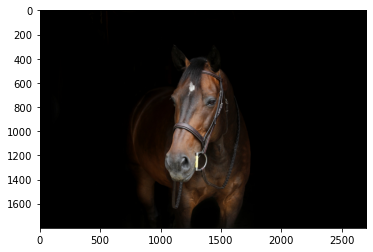

In [21]:
plt.imshow(horse_show)

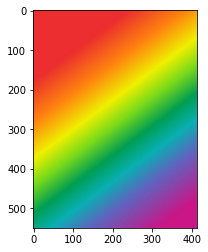

In [22]:
plt.imshow(rainbow_show)

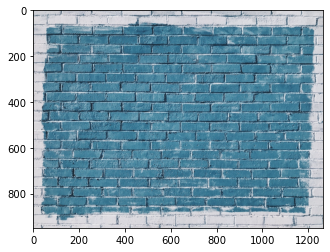

In [23]:
plt.imshow(brick_show)

In [24]:
plt.style.use(['science','notebook','grid'])

In [25]:
help(cv2.calcHist)

Help on built-in function calcHist:

calcHist(...)
    calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]]) -> hist
    .   @overload
    .   
    .   this variant supports only uniform histograms.
    .   
    .   ranges argument is either empty vector or a flattened vector of histSize.size()*2 elements
    .   (histSize.size() element pairs). The first and second elements of each pair specify the lower and
    .   upper boundaries.



In [28]:
hist_value_brick = cv2.calcHist([brick], channels=[0], mask= None, 
                          histSize=[256], ranges=[0, 256])

hist_value.shape

(256, 1)

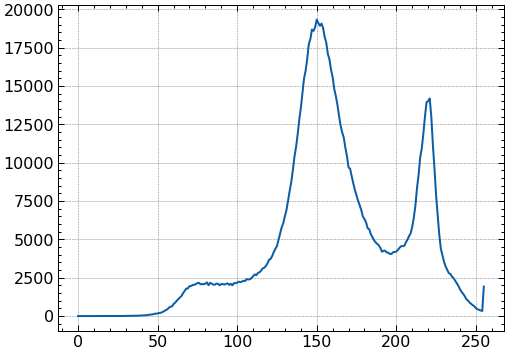

In [29]:
plt.plot(hist_value)

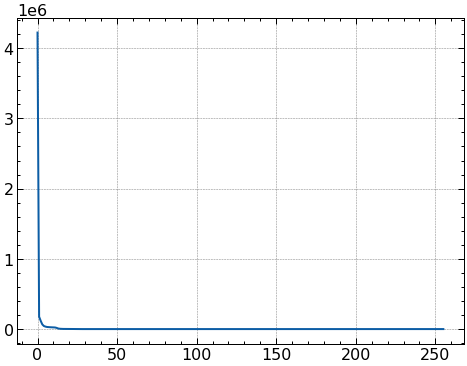

In [31]:
hist_value_horse = cv2.calcHist([horse], channels = [0], mask=None, 
                                histSize = [256], ranges=[0,2566])

plt.plot(hist_value_horse)

Text(0.5, 1.0, 'Histogram for blue bricks')

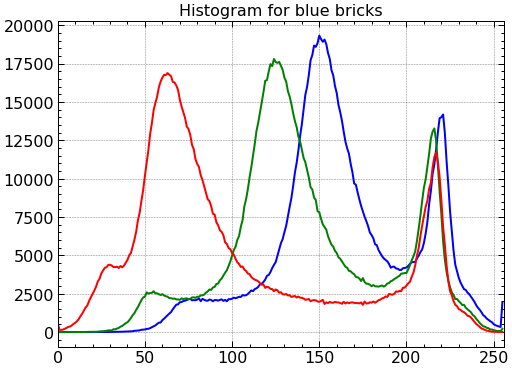

In [34]:
# to check all color channels for brick image

img = brick
color = ('b','g','r')

# fucntion to plot all color channels

for i,col in enumerate(color):
    hist = cv2.calcHist([img], [i], None, [256], [0,256])
    plt.plot(hist, color=col)
    plt.xlim([0,256])
    
plt.title('Histogram for blue bricks')

Text(0.5, 1.0, 'Histogram dark horse')

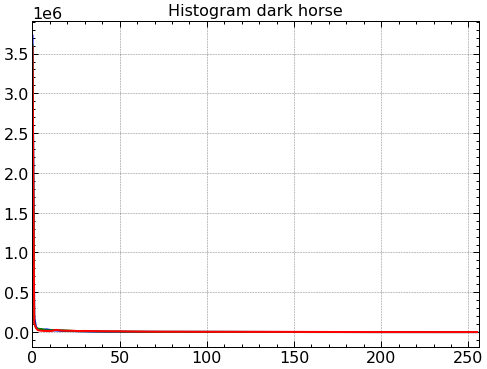

In [42]:
img = horse
color = ('b','g','r')

for i, col in enumerate(color) :
    hist = cv2.calcHist([img], [i], None, [256], [0,256])
    plt.plot(hist, color=col)
    plt.xlim([0, 256])
    
plt.title('Histogram dark horse')

Text(0.5, 1.0, 'Histogram dark horse')

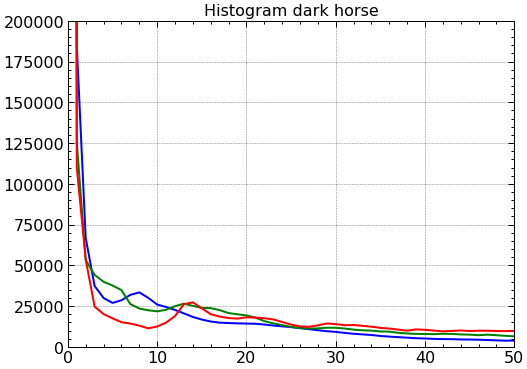

In [44]:
img = horse
color = ('b','g','r')

for i,col in enumerate(color):
    hist = cv2.calcHist([img], [i],None,[256], [0,256])
    plt.plot(hist, color=col)
    plt.xlim([0,50])
    plt.ylim([0, 200000])
    
plt.title('Histogram dark horse')

### Histogram Equalization

- is a method of contrast adjustment based on the image's histogram
- making the cumulative histogram much more linear - mean increasing the cotrast of an image's

In [48]:
rainbow = cv2.imread(r'C:\Users\Data\computer vision\rainbow.jpg')
rainbow_show = cv2.cvtColor(rainbow, cv2.COLOR_BGR2RGB)

In [49]:
img = rainbow
img.shape

(550, 413, 3)

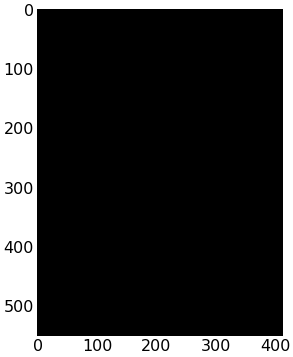

In [51]:
mask = np.zeros(img.shape[:2], np.uint8)
plt.imshow(mask, cmap='gray')

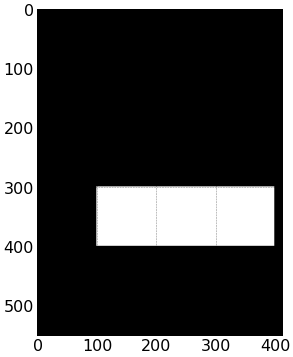

In [52]:
mask[300:400,100:400] = 255 # on 2D plane and then masked all three color channel
plt.imshow(mask, cmap='gray') # pure black

(550, 413, 3)


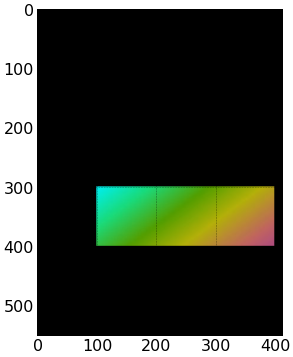

In [60]:
masked_img = cv2.bitwise_and(img, img, mask =mask) # for hist
show_masked_img = cv2.bitwise_and(rainbow, rainbow, mask=mask)  # to show

print(show_masked_img.shape)
plt.imshow(show_masked_img)

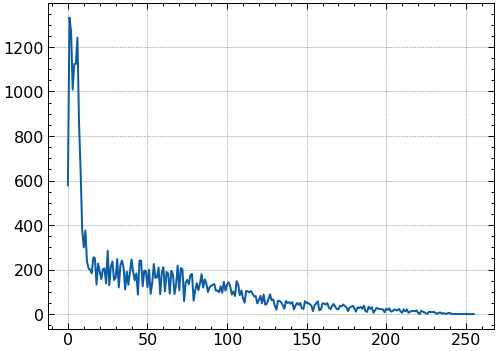

In [61]:
hist_mask_value_red = cv2.calcHist([rainbow], channels=[2], mask=mask, 
                                   histSize=[256], ranges=[0,256])
plt.plot(hist_mask_value_red )

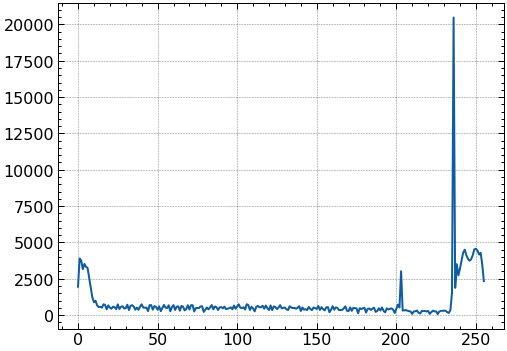

In [71]:
hist_value_red = cv2.calcHist([rainbow], [2], None, [256],[0,256])
plt.plot(hist_value_red)

---------
----------

In [81]:
# grayscale

# Analyze in black and white
gorilla = cv2.imread(r'C:\Users\Data\computer vision\gorilla.jpg', 0)

def display_img(img, cmap=None):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')
    
gorila.shape

(1295, 1955)

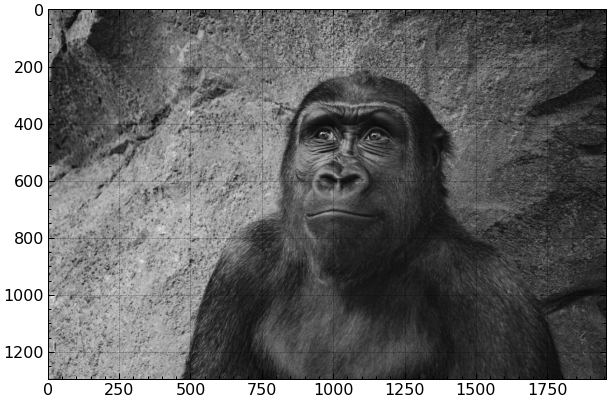

In [82]:
display_img(gorila)

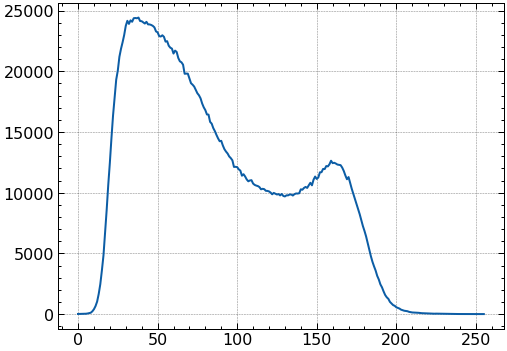

In [83]:
hist_value =cv2.calcHist([gorilla], channels=[0], mask=None, histSize=[256], ranges=[0,256])
plt.plot(hist_value)

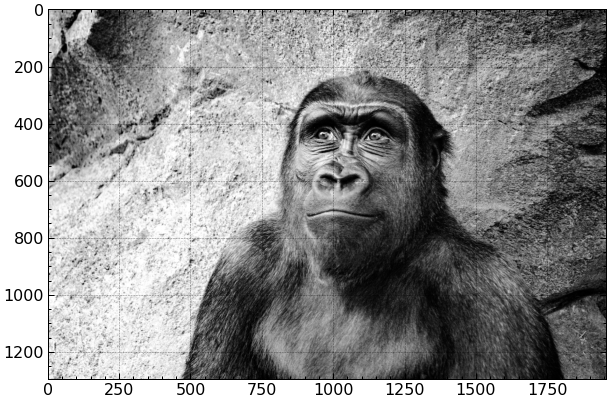

In [87]:
eq_gorilla = cv2.equalizeHist(gorilla)
display_img(eq_gorilla, cmap='gray')

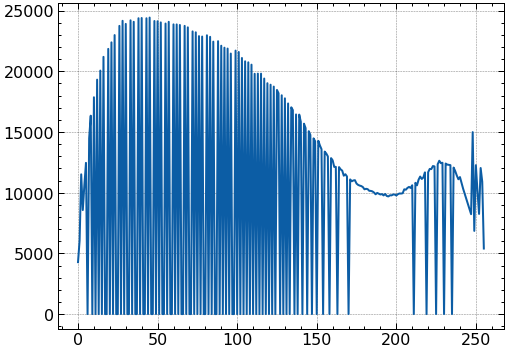

In [88]:
hist_value = cv2.calcHist([eq_gorilla], channels=[0], mask=None, 
                          histSize=[256], ranges=[0,256])

plt.plot(hist_value)

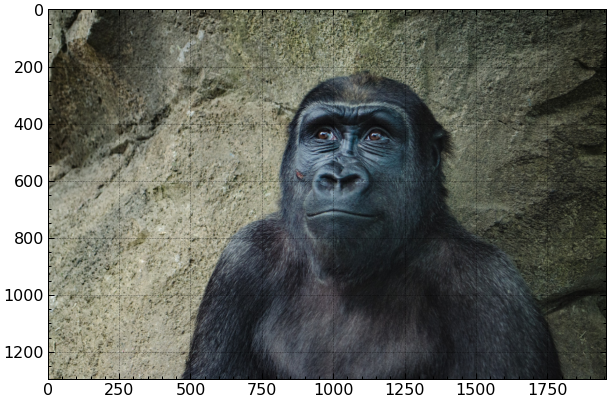

In [89]:
# color image

color_gorilla = cv2.imread(r'C:\Users\Data\computer vision\gorilla.jpg')
show_gorilla = cv2.cvtColor(color_gorilla, cv2.COLOR_BGR2RGB)

display_img(show_gorilla)


In [90]:
hsv = cv2.cvtColor(color_gorilla, cv2.COLOR_BGR2HSV)



hsv[:,:,2].max()

255

In [93]:
# use equalizer

hsv[:,:,2] = cv2.equalizeHist(hsv[:,:,2])

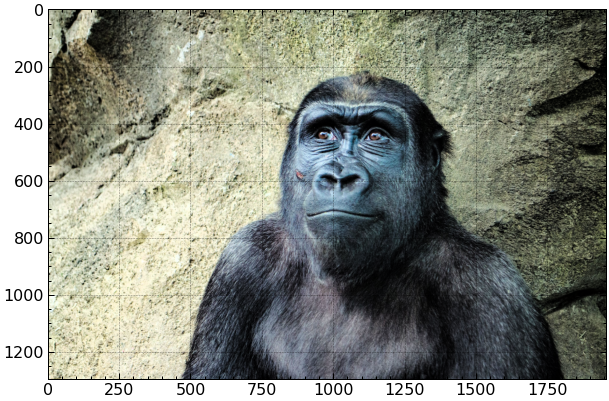

In [95]:
eq_color_gorilla = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
display_img(eq_color_gorilla)